In [954]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline

In [955]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [956]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Book/Book_1.csv')
df.head()

,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_9(A1),raw_10(C1),raw_11(A2),raw_12(C2)
0,1.0,0.2,0.8,0.0060,0.747,0.0064,0.283,0.000,0.05700,0.00,0.814,0.81
1,1.0,0.6,0.4,0.0019,0.603,0.0030,0.156,0.000,0.04865,0.00,0.667,0.67
2,1.0,0.9,0.1,0.0005,0.351,0.0018,0.041,0.000,0.11600,0.00,0.358,0.36
3,0.1,0.1,0.9,0.0650,0.883,0.0660,0.337,0.150,0.53000,0.53,0.540,0.55
4,0.1,0.4,0.6,0.0130,0.701,0.0140,0.399,0.497,0.12000,0.12,0.489,0.48


In [957]:
merged_1 = df[[	'raw_1','raw_2','raw_3','raw_4','raw_5','raw_6','raw_7','raw_8','raw_9(A1)']]
merged_1.head()

,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_9(A1)
0,1.0,0.2,0.8,0.0060,0.747,0.0064,0.283,0.000,0.05700
1,1.0,0.6,0.4,0.0019,0.603,0.0030,0.156,0.000,0.04865
2,1.0,0.9,0.1,0.0005,0.351,0.0018,0.041,0.000,0.11600
3,0.1,0.1,0.9,0.0650,0.883,0.0660,0.337,0.150,0.53000
4,0.1,0.4,0.6,0.0130,0.701,0.0140,0.399,0.497,0.12000


In [958]:
from sklearn.model_selection import train_test_split

In [959]:
X = merged_1.drop('raw_9(A1)',axis = 1).values
y = merged_1['raw_9(A1)'].values

In [960]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [961]:
X_train.shape

(10, 8)

In [962]:
X_test.shape

(4, 8)

In [963]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [964]:
model = Sequential()

model.add(Dense(8, input_dim = 8,  activation = 'relu'))
keras.layers.Dropout(0.2)
model.add(Dense(3, activation = 'relu'))
keras.layers.Dropout(0.2)
model.add(Dense(3, activation = 'relu'))
#model.add(Dense(164, activation = 'relu'))
#keras.layers.Dropout(0.1)
model.add(Dense(1, activation = 'sigmoid'))

In [965]:
model.compile(optimizer= 'adam', loss ='binary_crossentropy', ) 

In [966]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7058
Epoch 2/1000
1/1 [==============================] - 0s 747us/step - loss: 0.7042
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7027
Epoch 4/1000
1/1 [==============================] - 0s 946us/step - loss: 0.7013
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6999
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6941
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 13/1000
1/1 [==========================

In [967]:
loss_df = pd.DataFrame(model.history.history)


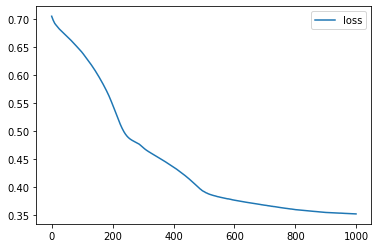

In [968]:
loss_df.plot()

In [969]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.5106


0.5106236934661865

In [970]:
model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 2ms/step - loss: 0.3514


0.35135236382484436

In [971]:
pred = model.predict(X_test)

In [972]:
pred= pd.Series(pred.reshape(4,))

In [973]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [974]:
pred_df = pd.concat([pred_df,pred],axis = 1)

In [975]:
pred_df.columns = ['Test True Y','Model Prediction']
pred_df

,Test True Y,Model Prediction
0,0.530,0.464861
1,0.520,0.492705
2,0.013,0.051043
3,0.116,0.008672


In [976]:
y_test

array([0.53 , 0.52 , 0.013, 0.116])

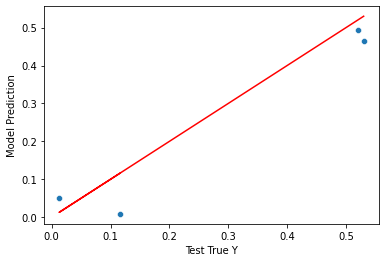

In [977]:
sns.scatterplot(x = 'Test True Y', y = 'Model Prediction', data = pred_df)
plt.plot(y_test,y_test,'r')

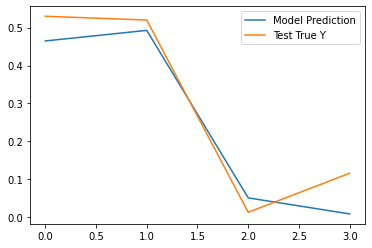

In [981]:
from matplotlib import pyplot
pyplot.plot(pred, label='Model Prediction')
pyplot.plot(y_test, label='Test True Y')
pyplot.legend()
pyplot.show()